In [2]:
import random
import pickle
import os
import cv2
import numpy as np
import tensorflow
from PIL import Image
from matplotlib import pyplot as plt
from patchify import patchify
from enum import Enum
import segmentation_models as sm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from predict_B_fun import predict_modelB
from predict_A_fun import predict_modelA
from predict_C_fun import predict_modelC


Segmentation Models: using `tf.keras` framework.


In [56]:
image_path = r"C:\Users\jiric\Documents\GitHub\Semanticka-segmentace-leteckych-snimku\Model B test\Results\Landcover ai\Sample 3\original_image.tif"
save_path = r"C:\Users\jiric\Documents\GitHub\Semanticka-segmentace-leteckych-snimku\Model B test\Results\Landcover ai\Sample 3\prediction.png"

scale = 1
# enlarge pixel size
# eg. scale 4 changes pixel size from 25x25cm to 100x100cm

chosen_model = 2
# 1 for Model A
# 2 for Model B
# 3 for Model C


In [57]:
if chosen_model == 1:
    image_original, image_cropped, image_prediction = predict_modelA(image_path,scale)
elif chosen_model == 2:
    image_original, image_cropped, image_prediction = predict_modelB(image_path,scale)
elif chosen_model == 3:
    image_original, image_cropped, image_prediction = predict_modelC(image_path,scale)
else:
    print("ERROR: INVALID MODEL CHOSEN")

print("DONE")

Original image shape: (9441, 8825, 3)
FINAL TIME: 103.34283709526062
Predicted image shape: (9216, 8704, 1)
DONE


In [58]:
image_cropped = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2RGB)
print(image_prediction.shape, np.unique(image_prediction))

image_prediction = np.squeeze(image_prediction)

pred_enc = np.zeros([image_prediction.shape[0], image_prediction.shape[1],3])

pred_enc[image_prediction == 0,:] = [255, 255, 255]
pred_enc[image_prediction == 1,:] = [0, 0, 0]
pred_enc = pred_enc.astype(np.uint8)
print(pred_enc.shape, np.unique(pred_enc))

(9216, 8704, 1) [0. 1.]
(9216, 8704, 3) [  0 255]


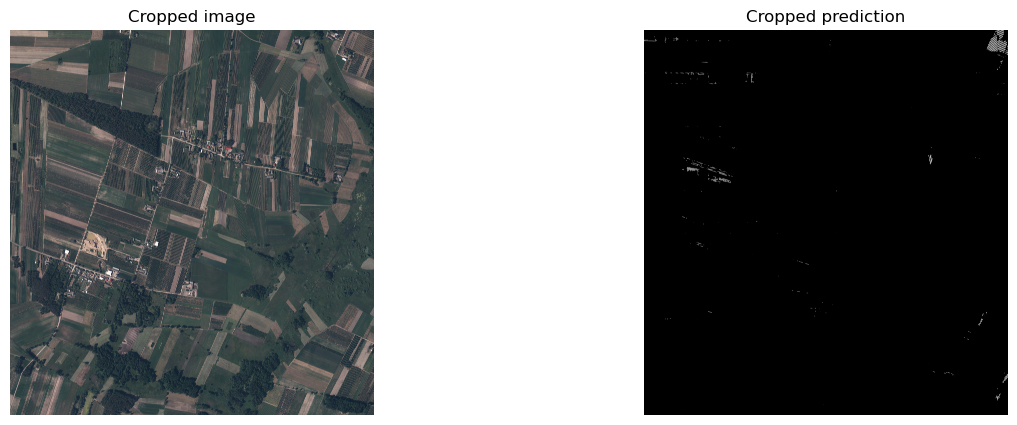

In [59]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(image_cropped)
plt.title('Cropped image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(pred_enc, cmap='binary')
plt.title('Cropped prediction')
plt.axis('off')

plt.show()

In [60]:
image_prediction_rgb = cv2.cvtColor(pred_enc, cv2.COLOR_RGB2BGR)
cv2.imwrite(save_path, image_prediction_rgb)

True